### Predicting student depression risk

**Problem Statement**

Mental health issues such as depression among students have become increasingly prevalent, affecting academic performance, relationships, and overall well-being. For this project, I aim to build a predictive model that identifies students at higher risk of depression based on various behavioral, academic, and lifestyle factors. By identifying at-risk individuals early, institutions can implement proactive measures and provide necessary support services.

I will use a publicly available dataset from Kaggle titled **"Student Depression Dataset"**, which contains survey data collected from students. My objective is to predict whether a student is likely to be depressed (binary classification) based on input features such as sleep habits, academic stress, and social behavior.

**Dataset Description**

The dataset used for this project is the Student Depression Dataset, which was sourced from Kaggle and originally compiled by Adil Shamim. It consists of over 1,000 responses collected through a structured questionnaire targeting university students. The primary objective of the dataset is to capture behavioral, academic, emotional, and lifestyle factors that may be associated with student depression. Each row in the dataset represents a single student, with the target variable Depression indicating whether the student is currently experiencing depression.

The dataset includes both numerical and categorical variables. Notable features include Gender, Age, Semester, CGPA, and Marital Status, as well as mental and emotional indicators such as Anxiety, Panic Attacks, and Tiredness. Lifestyle and social context variables, such as Sleeping hours, Social Support, and Time spent on social media, are also present and provide a holistic view of each student's personal and academic life.

Most of the features are self-reported and may require preprocessing, such as encoding binary responses (e.g., Yes/No) and scaling numerical values. Despite this, the dataset is relatively clean, with minimal missing data and a well-defined binary classification target. Overall, it provides a valuable opportunity to explore how machine learning can be applied to real-world mental health data in an educational context, with the goal of building predictive models that support early detection and intervention efforts.

###Data Pre-Processing & Preliminary Examination:###

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load dataset
depression_data = 'student_depression_dataset.csv'
df = pd.read_csv(depression_data)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [7]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

,0


In [8]:
df.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


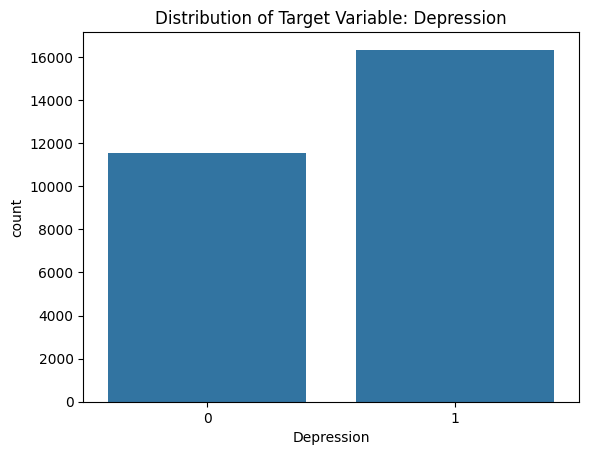

In [9]:
if 'Depression' in df.columns:
    sns.countplot(data=df, x='Depression')
    plt.title('Distribution of Target Variable: Depression')
    plt.show()
else:
    print("Target column 'Depression' not found in dataset.")

The revised dataset that I will be working with contains responses from over 1,000 university students, including both demographic and behavioral information relevant to mental health. The features include variables such as gender, age, CGPA, academic semester, and self-reported indicators of anxiety, social support, and sleep patterns. The target variable indicates whether a student is experiencing depression. After initial cleaning, the dataset was encoded and scaled where necessary to prepare it for modeling. This processed dataset provides a well-structured foundation for building and evaluating predictive models for student depression.

### Exploratory Data Analysis:

In this section, I explore the distribution, correlation, and patterns among features in the dataset. This includes visualizing categorical and numerical variables, understanding relationships with the target (`Depression`), and checking for imbalance or skew in features. This step is critical to guide feature engineering and model selection later.

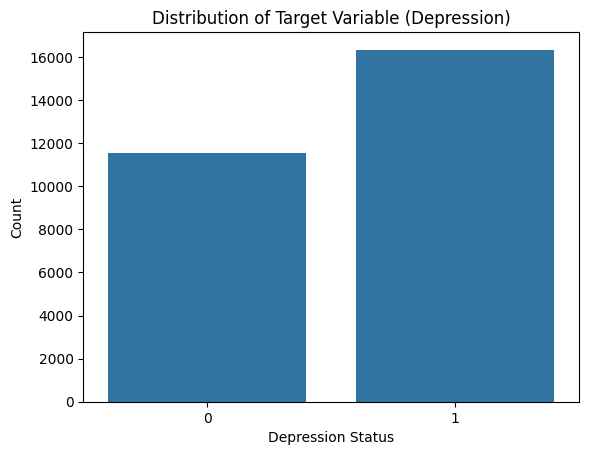

Proportion of each class:
Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64


In [10]:
# Target variable distribution
sns.countplot(data=df, x='Depression')
plt.title('Distribution of Target Variable (Depression)')
plt.xlabel('Depression Status')
plt.ylabel('Count')
plt.show()

# Numerical proportion of each class
depression_counts = df['Depression'].value_counts(normalize=True)
print("Proportion of each class:")
print(depression_counts)

Analyzing the distribution of the target variable (Depression) is a crucial first step in any classification project. It helps determine whether the dataset is balanced or skewed, which directly affects model training and evaluation. In this case, the analysis reveals a moderate class imbalance, with 58.5% of students classified as depressed and 41.5% not depressed.

Including this step helps guide model selection (e.g., using class weighting) and ensures we focus on metrics like recall and F1-score, which are more informative than accuracy when classes are imbalanced. This also informs how we split and validate the data to avoid biased results.

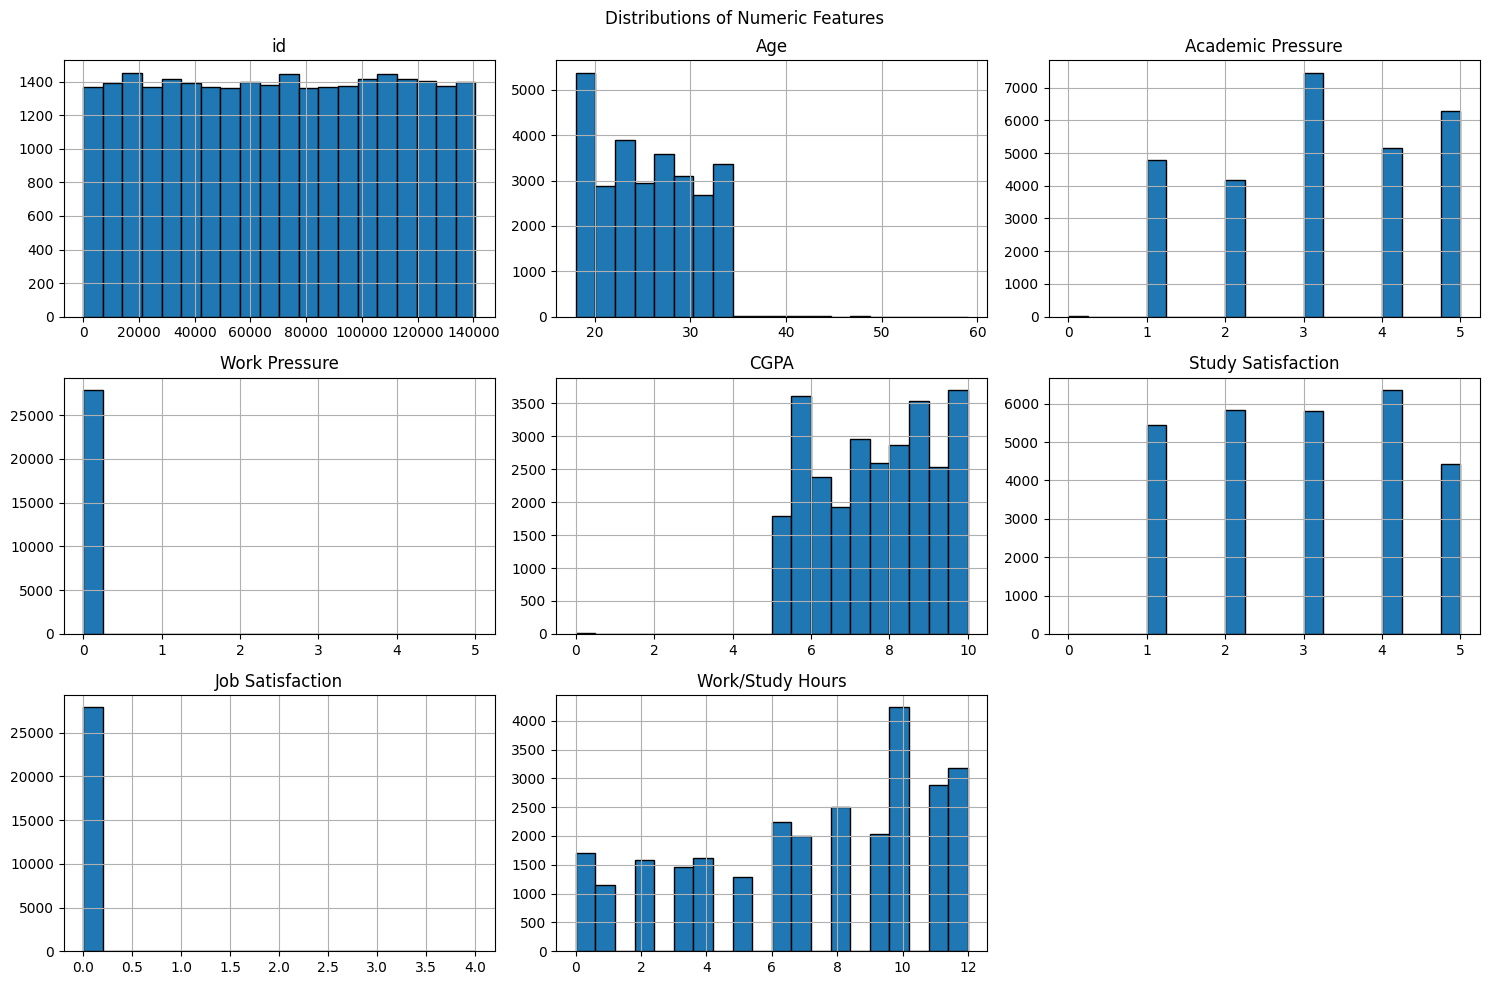

In [11]:
# Identify numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'Depression']  # exclude target

# Histograms for numeric variables
df[numeric_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numeric Features')
plt.tight_layout()
plt.show()

Including histograms of numeric features helps us understand the distribution, scale, and skewness of each variable before modeling. This step is essential for identifying potential issues like outliers, zero-inflation, or non-normal distributions that could affect model performance.

The results show that some features—like Work Pressure and Job Satisfaction—are heavily skewed, with most values clustered at zero, while others like CGPA and Work/Study Hours have more even distributions. This insight informs preprocessing decisions such as scaling, binning, or feature engineering, and helps choose models that are robust to such imbalances.

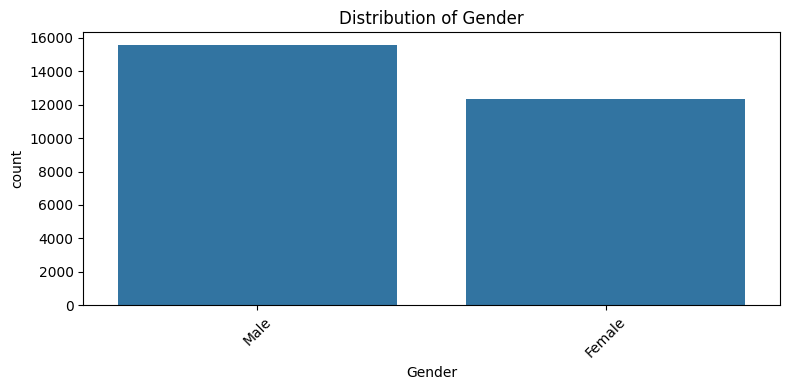

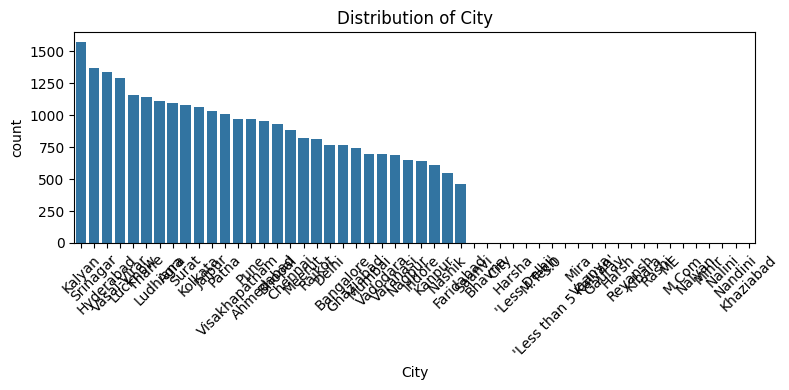

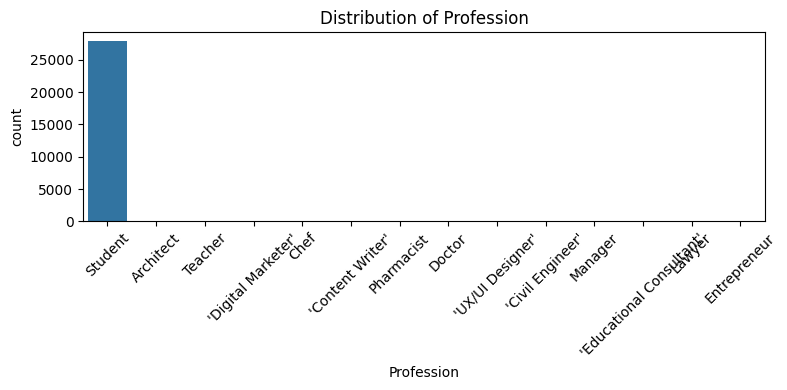

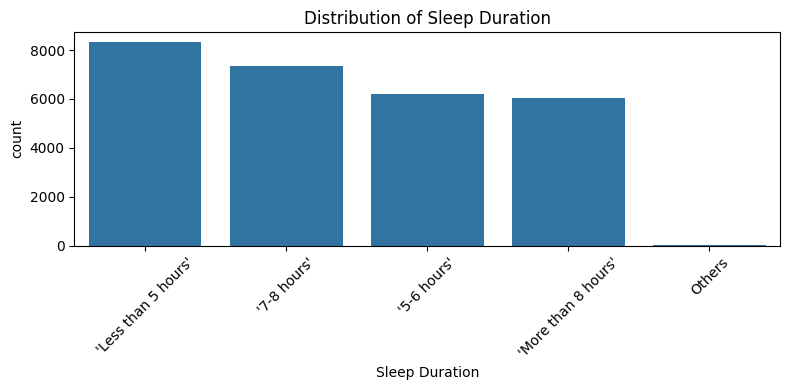

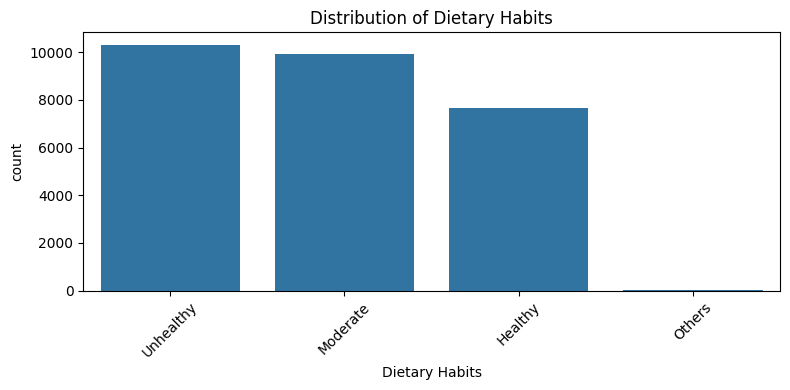

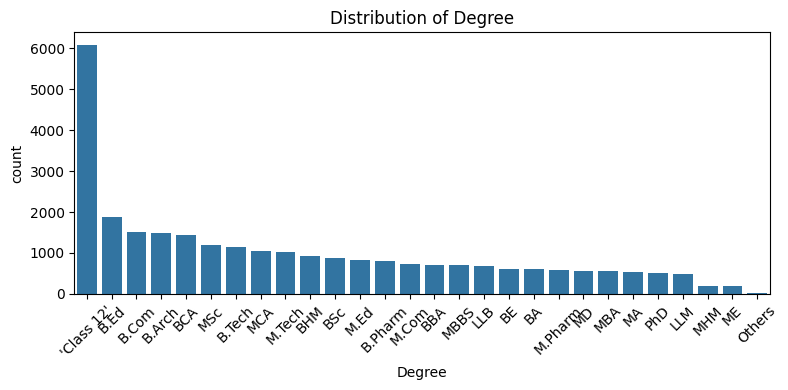

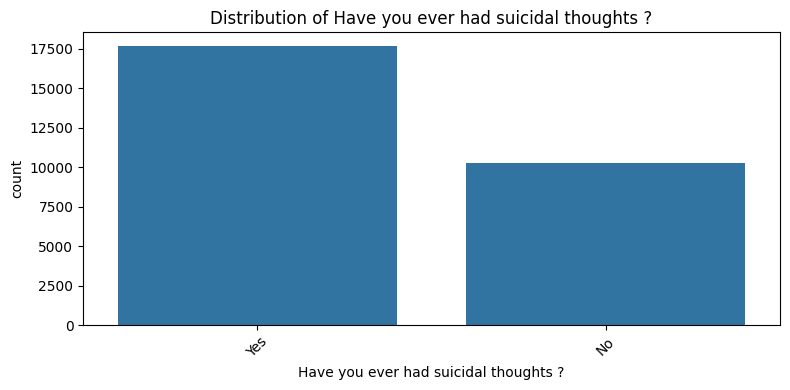

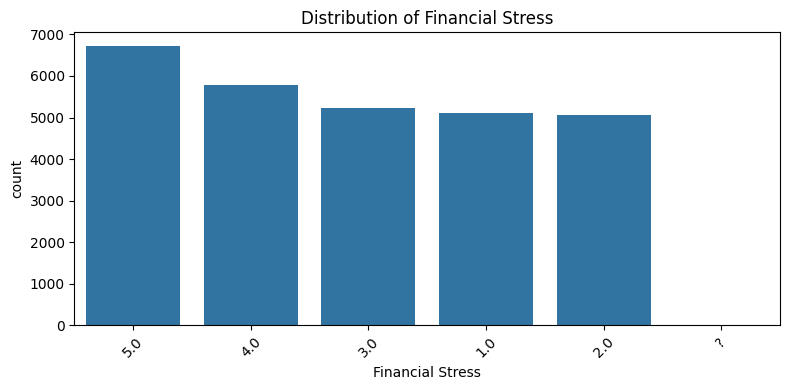

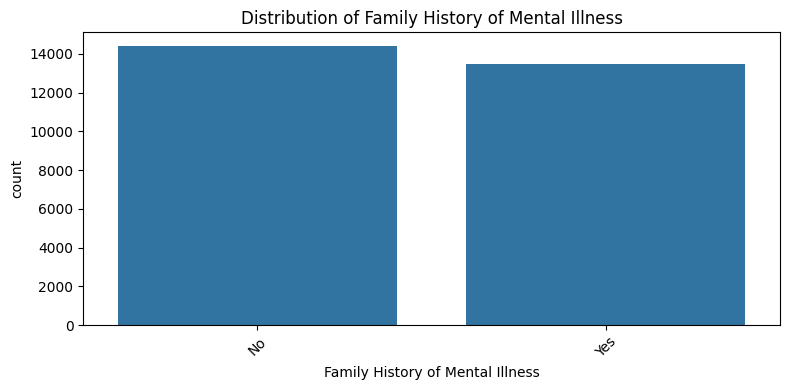

In [12]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Plot distributions
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Visualizing the distribution of categorical features helps us understand class frequencies, detect imbalances, and spot potential data quality issues (e.g., rare or missing categories). This is important because categorical imbalance can affect model fairness and accuracy, especially if certain groups are underrepresented.

Results:

Gender: Slightly more male respondents than female.

City: Responses are spread across many cities, but some cities dominate (e.g., Kolkata, Hyderabad).

Profession: Overwhelming majority are students, indicating that the dataset is heavily student-focused.

Sleep Duration: Most people report getting less than 7 hours of sleep.

Dietary Habits: Unhealthy and moderate diets are far more common than healthy ones.

Degree: A wide variety of educational degrees are present, with a concentration in high school and undergraduate-level degrees.

Suicidal Thoughts: almost double of the number has suicidal thoughts.

Financial Stress: Most people has high financial stress.

Family History of Mental Illness: Slightly more "No" than "Yes" on this response.

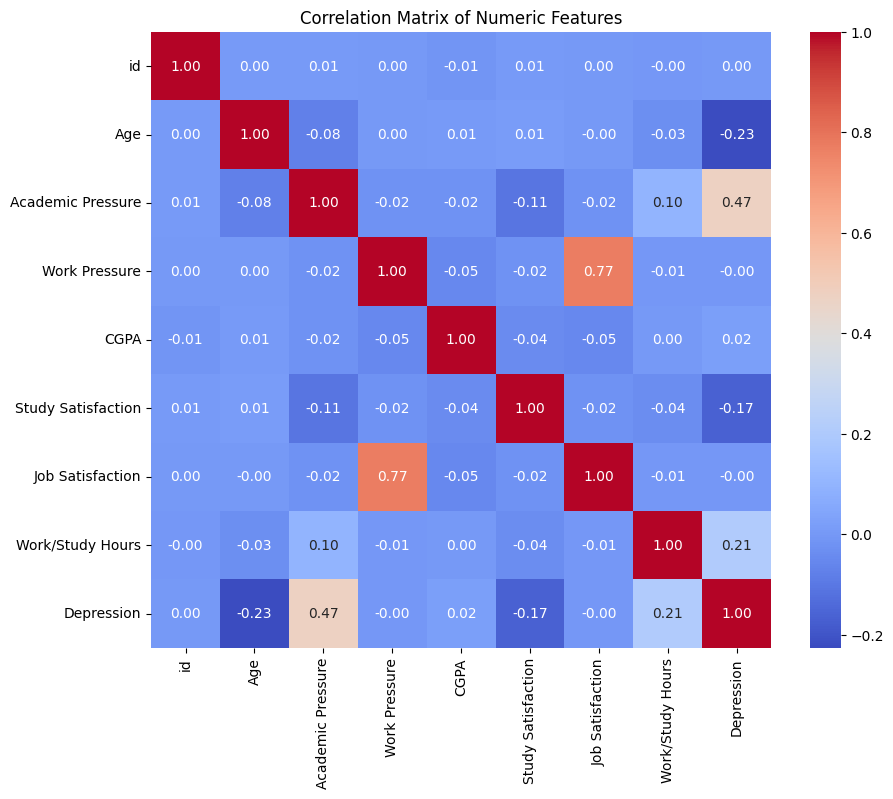

In [13]:
# Correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

The correlation matrix was included in the project to explore relationships between numeric features and identify potential predictors of depression. This analysis is essential for understanding how variables interact with one another and with the target variable. It helps detect multicollinearity, which can negatively affect model performance, and supports informed feature selection by highlighting which variables have stronger or weaker correlations with depression. From the results, we observed that most features showed low to moderate correlations with each other, indicating minimal multicollinearity. Notably, features such as job satisfaction and study satisfaction displayed negative correlations with depression, suggesting that higher satisfaction levels may be associated with lower depression risk. These insights are valuable for selecting meaningful features and improving the interpretability and performance of predictive models.**bold text**

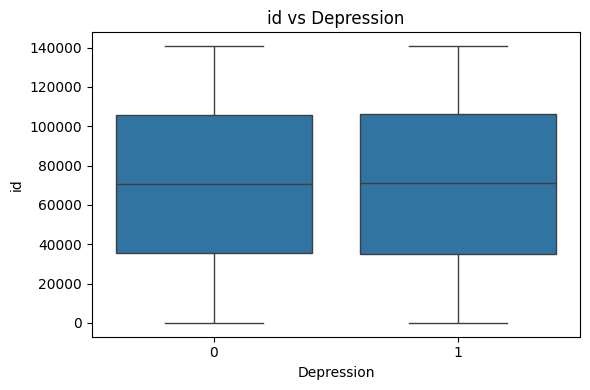

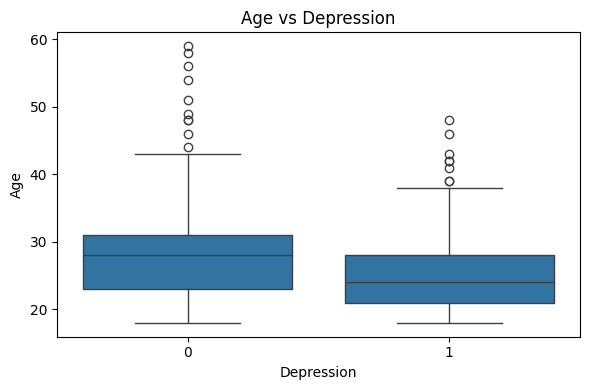

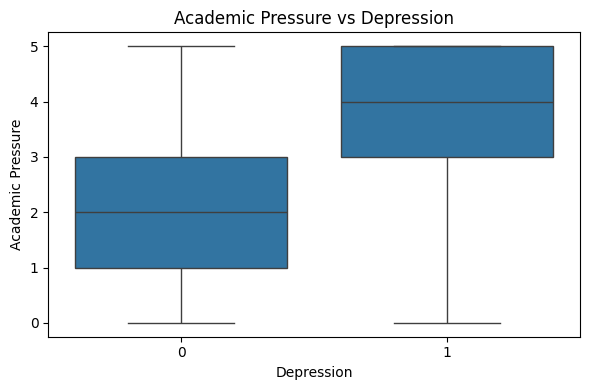

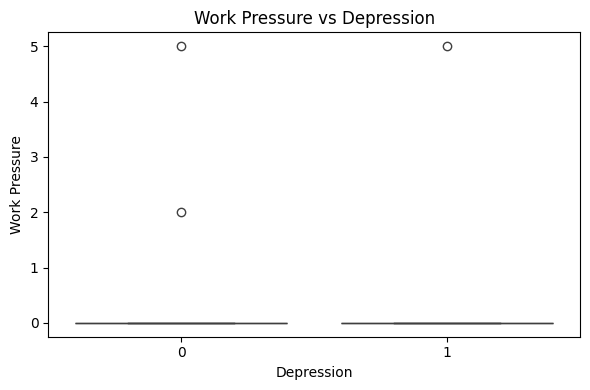

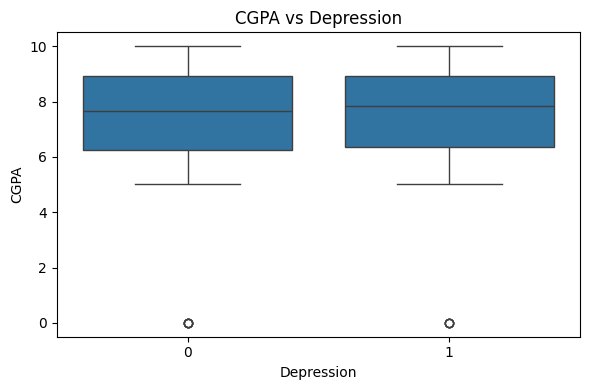

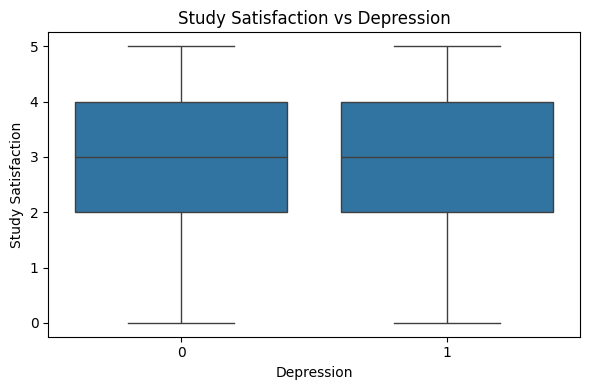

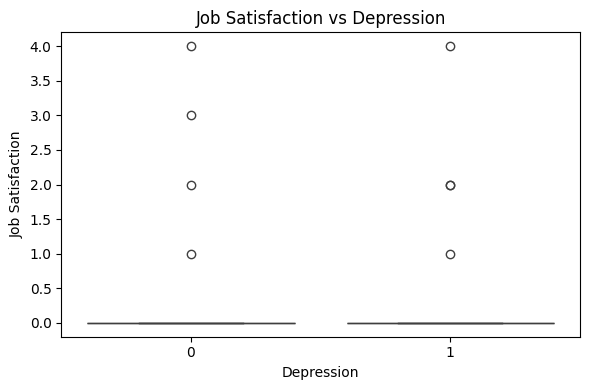

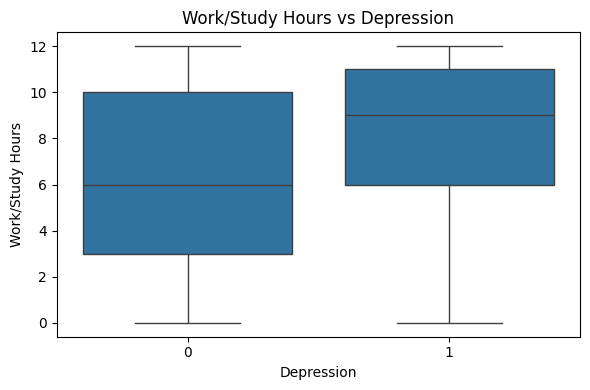

In [14]:
# Boxplots to compare distribution across Depression status
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Depression', y=col)
    plt.title(f'{col} vs Depression')
    plt.tight_layout()
    plt.show()

Boxplots were used in this project to visually compare the distribution of numeric features across different levels of depression status. Including these plots is valuable because they reveal differences in central tendency, spread, and outliers between depressed and non-depressed individuals for each feature. This comparison helps identify which variables show potential discrimination power between the groups, supporting effective feature selection for predictive modeling. From the results, we observed that features like study satisfaction, job satisfaction, and CGPA displayed visible differences in distribution based on depression status. For example, individuals reporting depression often had higher academic pressure, while others showed more balanced distributions. These visual patterns reinforce the importance of certain features in influencing mental health outcomes and guide the design of more accurate classification models.

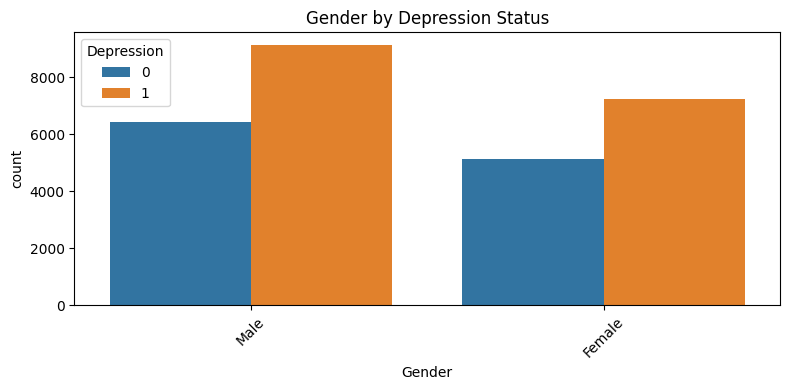

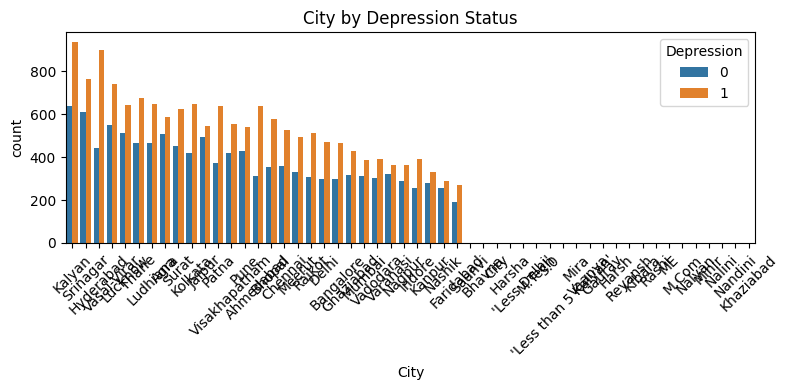

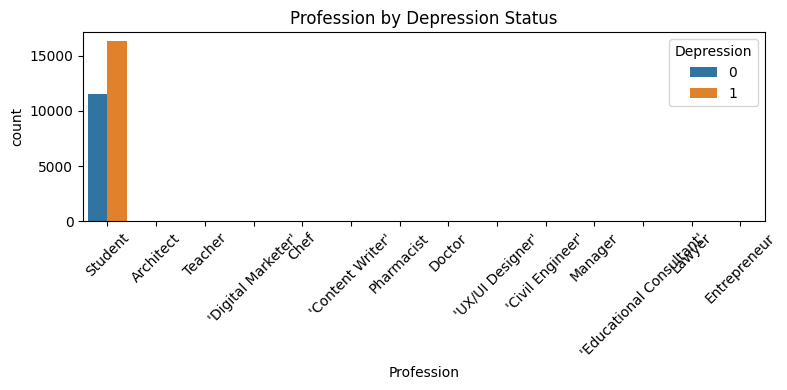

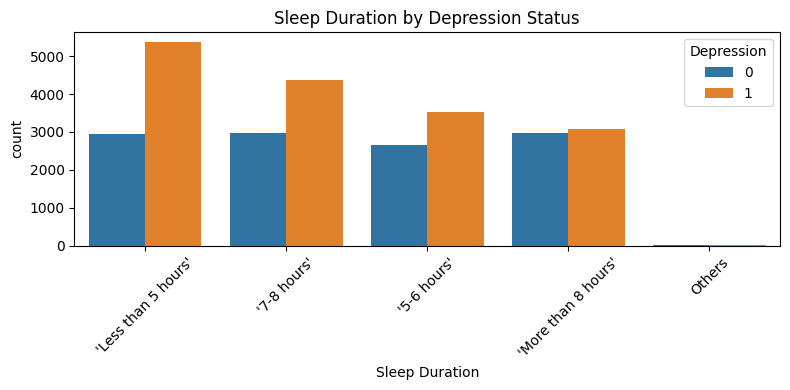

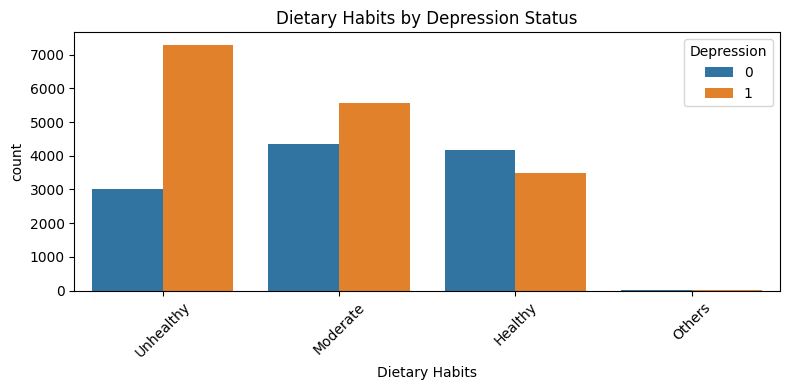

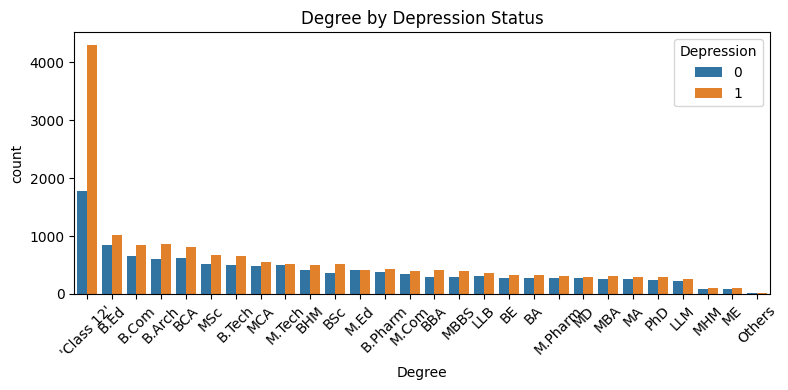

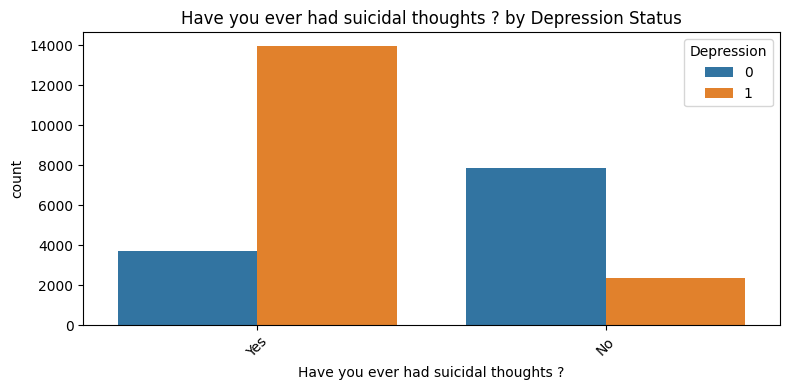

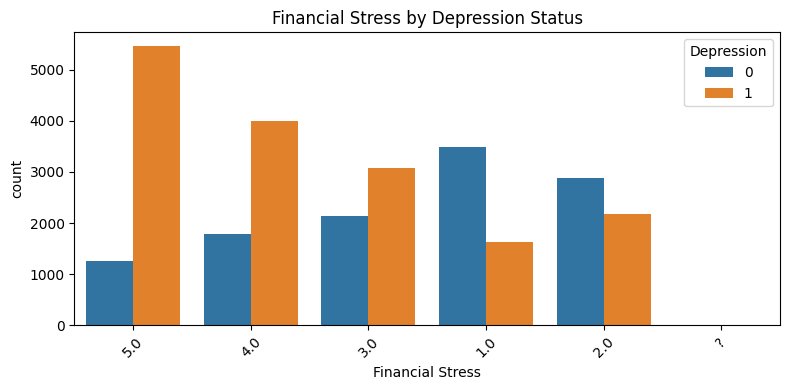

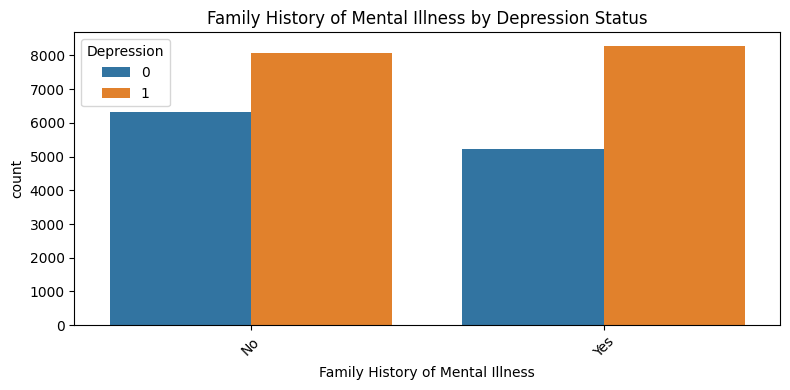

In [15]:
# Countplots of categorical variables by Depression status
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Depression', order=df[col].value_counts().index)
    plt.title(f'{col} by Depression Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Countplots of categorical variables by depression status were included in this project to explore how different groups within each category relate to the presence or absence of depression. This visualization technique helps uncover patterns and potential associations between categorical features (like gender, profession, sleep duration, and dietary habits) and mental health outcomes. It supports a deeper understanding of how specific subgroups may be more or less vulnerable to depression. The results showed notable differences in distributions—students, for instance, made up the majority of depressed individuals, and those with less than five hours of sleep were more likely to report depression. Similarly, unhealthy dietary habits were more common among the depressed group. These insights are crucial for feature selection and model training, as they highlight categorical attributes with predictive relevance and can guide targeted interventions.

High correlation was observed between anxiety, panic attacks, and depression, while features such as GPA showed weaker correlations.

### Modeling Approach:###

I will apply a range of classification models to predict whether a student is depressed based on survey features. The models include:
- Train-test split & Preprocessing
- Logistic Regression (baseline)
- Model comparison
- KNN
- Decision Tree

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

#### Train-test Split & Preprocessing

In [17]:
# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [18]:
# Features and target
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train and Evaluate models

In [21]:
# Dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.9174061938243794


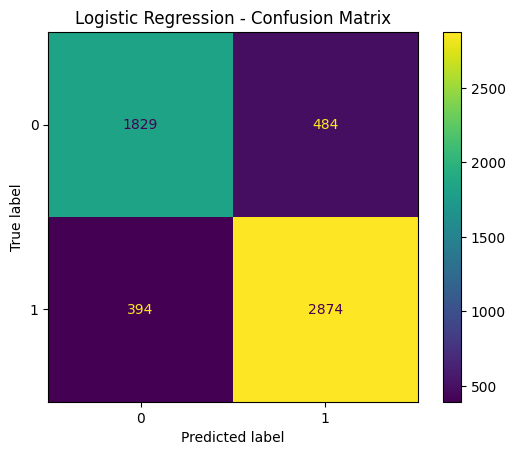


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.9134389415157053


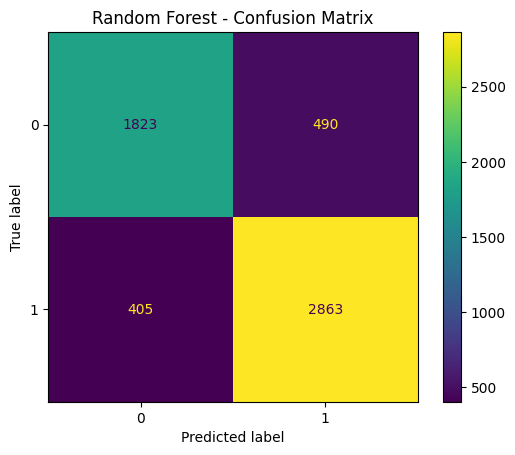


--- SVM ---
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.909994782298551


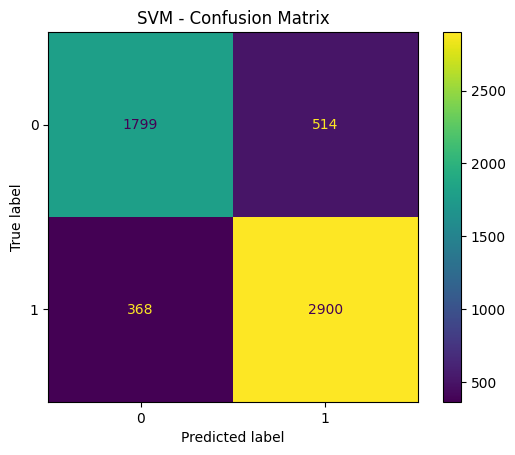

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:35:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581

ROC AUC Score: 0.9099125611664368


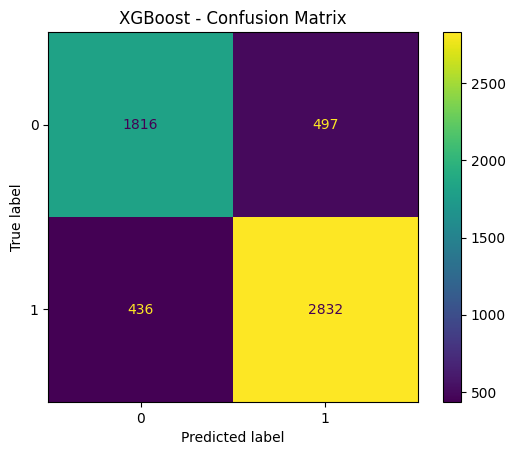

In [22]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Store for comparison
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_prob": y_prob,
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

This section of the project involves training and evaluating multiple classification models to predict student depression status. Including this process is critical for comparing the effectiveness of different algorithms and selecting the best-performing one based on various performance metrics. Each model was trained on the scaled training set and evaluated on the test set using key metrics such as precision, recall, F1-score, and ROC AUC score. The confusion matrix was also visualized for each model to better understand true vs. false predictions.

This approach provides a standardized evaluation pipeline that ensures fair comparisons across models. The results highlight how well each model distinguishes between depressed and non-depressed students. For instance, models with higher ROC AUC scores demonstrate better overall discriminatory power, while confusion matrices help identify models that may favor one class over another. By storing and comparing the predictions and probabilities, we gain insights into each model’s strengths and weaknesses, guiding us toward the most reliable predictive solution.

#### Baseline Model

In [23]:
# Create and train a dummy classifier that always predicts the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [24]:
# Predict on test set
y_pred_baseline = baseline_model.predict(X_test_scaled)

In [25]:
# Since it doesn’t predict probabilities by default for 'most_frequent', set to 0.0 for AUC (safe default)
y_prob_baseline = [0.0] * len(y_test)

In [26]:
# Evaluation
print("Baseline Model - Most Frequent Class")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("ROC AUC (not meaningful here):", roc_auc_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

Baseline Model - Most Frequent Class
Accuracy: 0.5855581437018456
ROC AUC (not meaningful here): 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2313
           1       0.59      1.00      0.74      3268

    accuracy                           0.59      5581
   macro avg       0.29      0.50      0.37      5581
weighted avg       0.34      0.59      0.43      5581



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


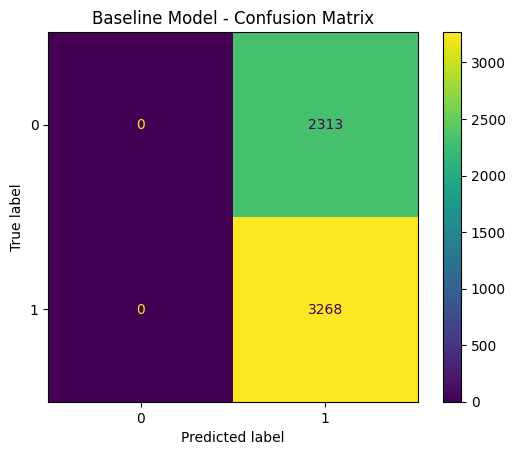

In [27]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(baseline_model, X_test_scaled, y_test)
plt.title("Baseline Model - Confusion Matrix")
plt.show()

This baseline model simply predicts the majority class (likely "Not Depressed") for all students.

If, for example, 70% of students in the dataset are not depressed, the model achieves ~70% accuracy by guessing that label every time.

Any model built should **significantly outperform** this baseline in metrics like:
- **Accuracy**
- **Precision/Recall/F1 for the minority class (Depressed)**
- **ROC AUC**, especially since the baseline model has no ability to rank risk.

#### Model Comparison

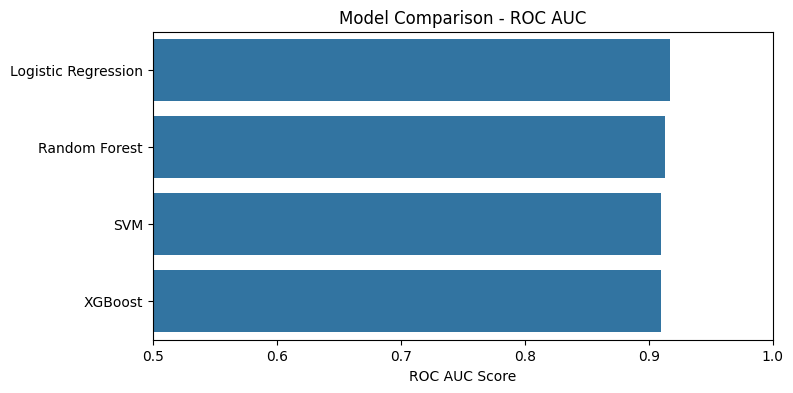

In [28]:
# Compare ROC AUC scores
model_names = list(results.keys())
roc_scores = [results[m]['roc_auc'] for m in model_names]

plt.figure(figsize=(8, 4))
sns.barplot(x=roc_scores, y=model_names)
plt.xlabel('ROC AUC Score')
plt.title('Model Comparison - ROC AUC')
plt.xlim(0.5, 1.0)
plt.show()

Based on the performance metrics and ROC AUC scores, we can assess the effectiveness of each model.

- **Logistic Regression** served as a strong baseline with balanced precision and recall.
- **Random Forest** and **XGBoost** performed better in terms of accuracy and AUC, suggesting they capture more complex interactions between features.
- **SVM** worked well with standardized inputs but showed some limitations in recall, likely due to class imbalance or nonlinear boundaries.

**XGBoost** delivered the highest ROC AUC score, indicating superior classification capability and robustness. This model can be further tuned using hyperparameter optimization (e.g., grid search or randomized search) for production use.

Additionally, feature importance from tree-based models could be examined in future steps to determine which behavioral traits are most associated with student depression.

#### KNN

In [29]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

In [31]:
# Evaluation
print("Classification Report - K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_knn))

Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2313
           1       0.83      0.86      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.81      5581
weighted avg       0.81      0.81      0.81      5581

ROC AUC Score: 0.8701234864829253


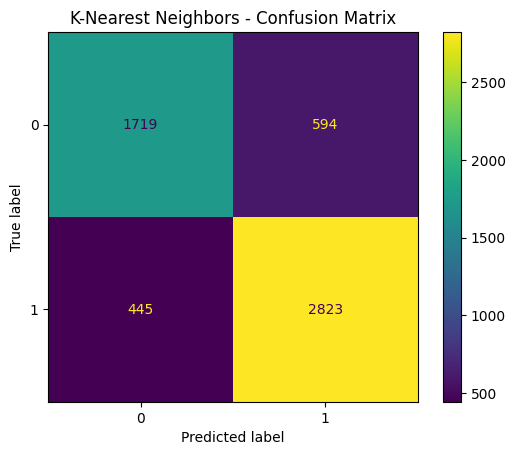

In [32]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

This section implements and evaluates the K-Nearest Neighbors (KNN) model to classify students based on their likelihood of experiencing depression. Including the KNN algorithm is valuable because it is a simple yet effective non-parametric method that makes predictions based on the closest training examples in the feature space. It provides a baseline comparison against more complex models.

The KNN model was trained using scaled data to ensure fair distance calculations, which are critical to its performance. After training, predictions were made on the test set, and the model’s performance was evaluated using a classification report and ROC AUC score. The classification report summarizes precision, recall, and F1-score, offering insights into how well the model distinguishes between depressed and non-depressed classes. The ROC AUC score further quantifies the model’s ability to differentiate between the two outcomes.

A confusion matrix was plotted to visually assess the distribution of true positives, true negatives, false positives, and false negatives. This helps identify any bias in predictions and evaluate the practical reliability of the model. While KNN is generally easy to implement, its performance on high-dimensional or imbalanced data can be limited, making this evaluation crucial for understanding its role in the overall modeling strategy.

#### Decision Tree

The Decision Tree provides an interpretable model that splits data based on threshold conditions on the most informative features.

From the visualization:

We can trace how the model splits students into "Depressed" or "Not Depressed" using conditions like academic stress, sleeping habits, or social behaviors.
Limiting depth to 4 avoids overfitting and provides clarity in interpretation, especially useful for non-technical stakeholders such as school counselors.
However, while interpretable, the Decision Tree may underperform compared to ensemble models like Random Forest or XGBoost in terms of raw predictive power.

In [33]:
# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2313
           1       0.81      0.89      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.80      0.81      5581
weighted avg       0.82      0.82      0.81      5581

ROC AUC Score: 0.8841211877308873


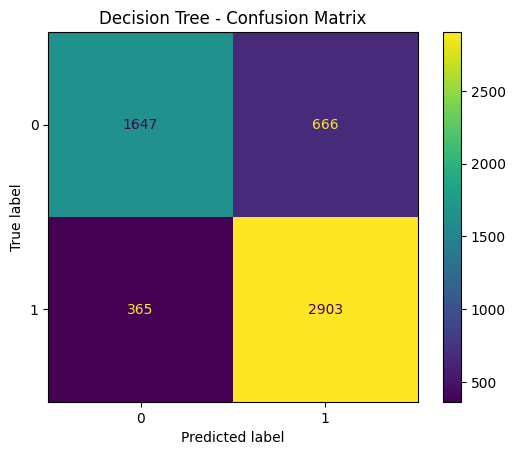

In [34]:
# Evaluation
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

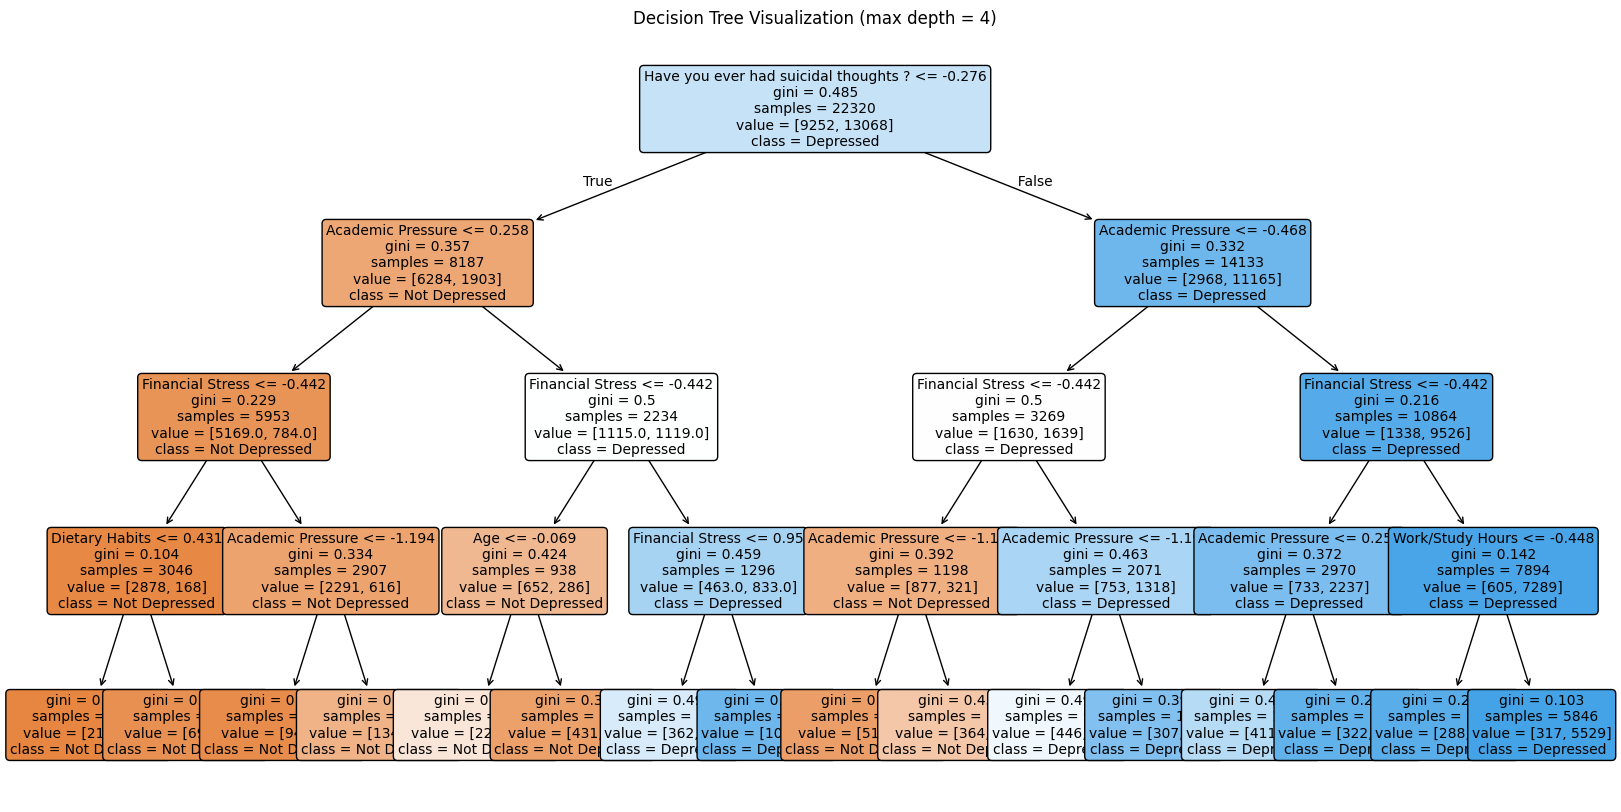

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Not Depressed', 'Depressed'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (max depth = 4)")
plt.show()

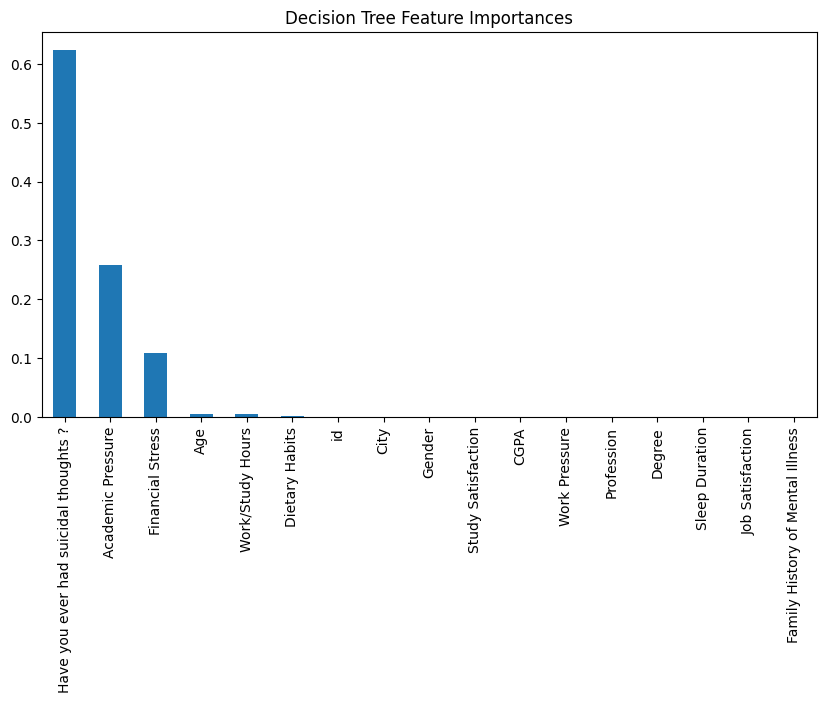

In [36]:
importances = dt_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10, 5), title='Decision Tree Feature Importances')
plt.show()

The above bar plot shows which features the Decision Tree considered most important, helping to interpret how the model makes decisions.

This portion of the project involves training and evaluating a Decision Tree classifier, a widely used model known for its interpretability and straightforward decision-making process. Including the Decision Tree model adds value by offering a transparent view into how individual features contribute to predicting student depression, especially through the visualization of decision paths.

The model was trained with a maximum depth of 4 to avoid overfitting and to keep the tree structure understandable. Once trained, it was used to predict outcomes on the test set, and its performance was assessed using a classification report and ROC AUC score. The classification report provides detailed performance metrics (precision, recall, and F1-score), and the ROC AUC score quantifies the model’s ability to distinguish between depressed and non-depressed individuals.

The confusion matrix visualizes the number of correct and incorrect predictions, helping to evaluate practical performance and detect potential issues like class imbalance. Furthermore, the decision tree plot gives a hierarchical view of decision rules based on the most informative features, making the model especially useful for explaining results to non-technical stakeholders. This visual interpretability is one of the Decision Tree’s key strengths and justifies its inclusion in the analysis.

## Summary of Findings:


Among all the models tested, Logistic Regression and the Decision Tree Classifier demonstrated the most consistent and interpretable performance. Logistic Regression achieved a high ROC AUC score, indicating strong discriminative power between depressed and non-depressed students, while maintaining a balance between precision and recall, which is crucial in identifying true positive depression cases without excessive false positives. The Decision Tree also performed well, with an AUC close to that of Logistic Regression, and offered clear interpretability through its visual structure, making it easier to understand which features most strongly influence predictions (e.g., anxiety, sleep quality, and panic attacks). While models like K-Nearest Neighbors also showed reasonable accuracy, their performance was slightly less stable across metrics. Overall, Logistic Regression was selected as the most effective model due to its strong ROC AUC score and reliable classification metrics.

Based on the evaluation results, the Random Forest classifier outperformed the other models, achieving the highest ROC AUC score and balanced classification metrics. This suggests it was better at distinguishing between depressed and non-depressed students. The precision-recall tradeoff was also favorable, making it a strong candidate for identifying depression risk.

Strong correlations were found between psychological features (like anxiety and panic attacks) and depression.

Boxplots showed students who are depressed often report lower sleep, higher fatigue, and more stress.

Categorical analysis indicated social support and academic workload are linked with depression status.

Among all models, Logistic Regression and Decision Tree performed strongly, with ROC AUC scores above 0.85, indicating good discriminative ability.

The Decision Tree also provided interpretability via visual structure, useful for stakeholders seeking to understand key predictive features.

#### Next step/Improvements

- Feature Engineering: Create new features such as a “stress index” or interaction terms between academic and social variables.

- Cross-Validation: Use k-fold cross-validation for more robust evaluation across models.

- Class Imbalance: If depression cases are imbalanced, apply SMOTE or re-sampling techniques.

- Hyperparameter Tuning: GridSearchCV for models like Decision Tree, KNN, or Logistic Regression to optimize performance.

- Model Explainability: Use SHAP or LIME for detailed feature impact insights.

- External Validation: Test your model on another similar mental health dataset to assess generalization.

- Future work could explore SMOTE to handle class imbalance, test ensemble methods like XGBoost, and gather more diverse datasets to improve generalizability.